In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_link = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/happiness_score_dataset.csv' 
df = pd.read_csv(data_link, index_col = ['Country'])

In [3]:
df.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Missing value

In [4]:
df.isnull().sum().sum()  # 0 missing value 

0

#### 2. Encoding

In [5]:
df.shape    # (158, 11)

(158, 11)

In [6]:
df.dtypes  # only region column is of Object type and Happiness rank columns is of int, which is like ordinal data

Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
dummies = pd.get_dummies(df.Region)
dummies

df = pd.concat([df, dummies], axis = 1)

# for avoid getdummies trap, we also require to delete a columns from the getdummies variables
df.drop(columns = ['Region', 'Happiness Rank', 'Western Europe'], inplace = True)
print(df.shape)
df

(158, 18)


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa
Country,,,,,,,,,,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,0
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,0
Denmark,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,0
Norway,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,0
Canada,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,0,1
Benin,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,0,1
Syria,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,0,1,0,0,0,0


In [8]:
df.dtypes  # all values are in numeric and float type
float_col = df.select_dtypes(include = ['float']).keys()
float_col

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

## Analysis

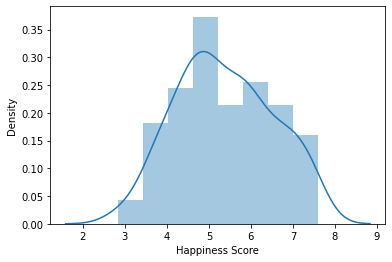

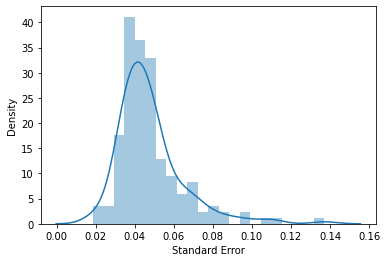

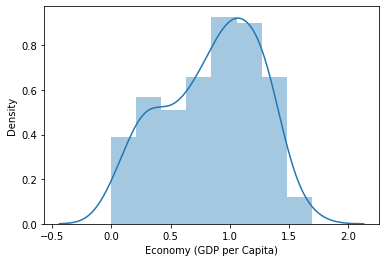

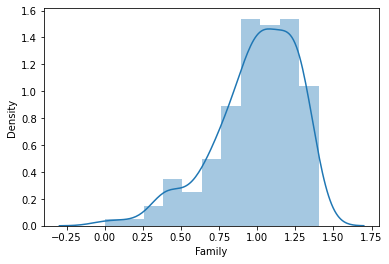

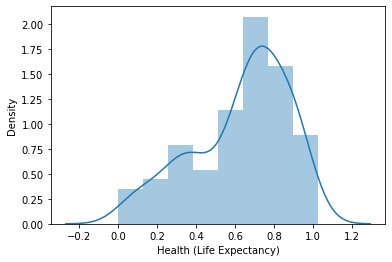

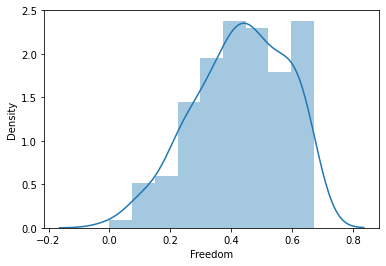

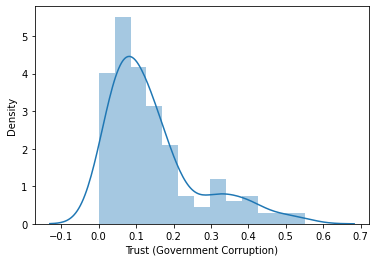

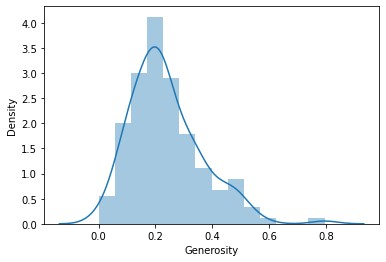

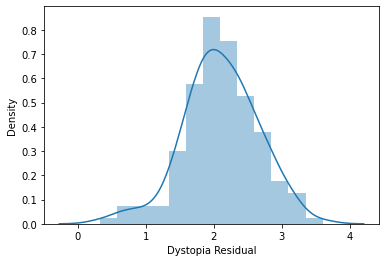

In [9]:
for i in float_col:
    plt.figure()
    sns.distplot(df[i])
    plt.show()  
    
# As we can observed skewness is present

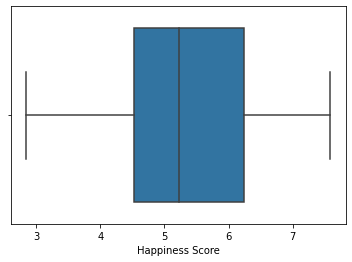

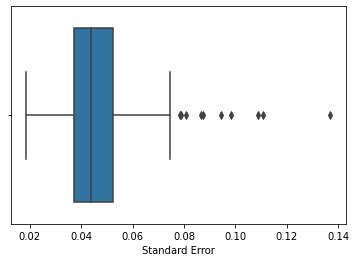

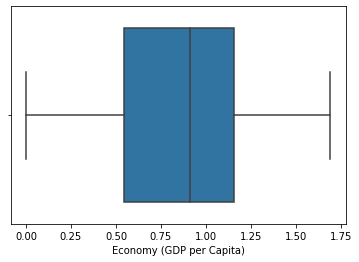

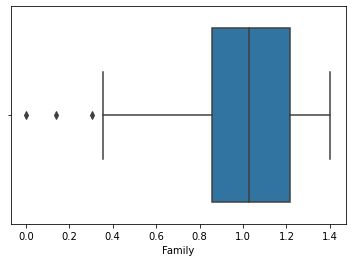

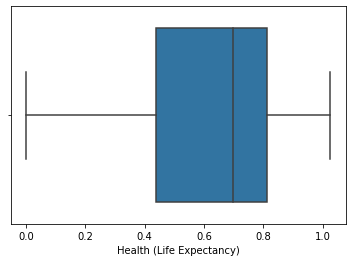

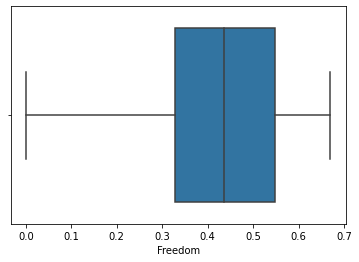

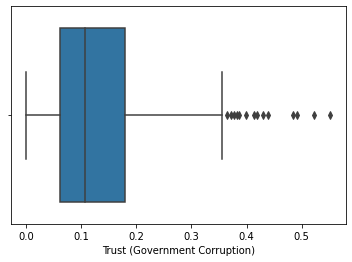

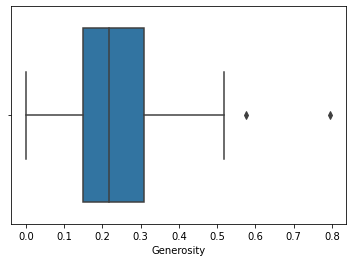

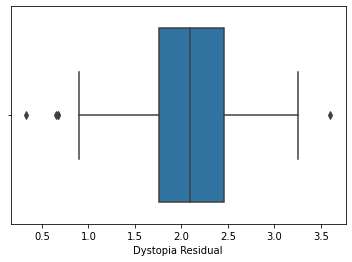

In [10]:
for i in float_col:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()  
# standard Error, family, Trut (Governemnt Corruption), Generosity and Dystopial Residual columns containing outliers

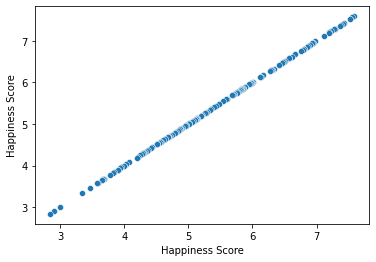

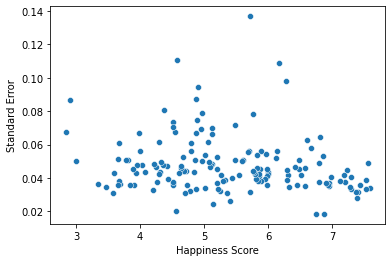

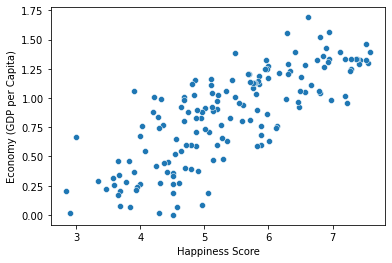

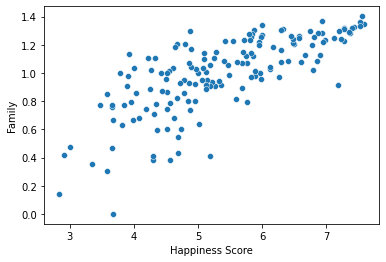

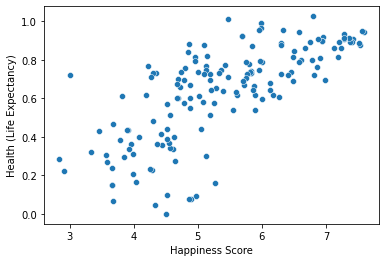

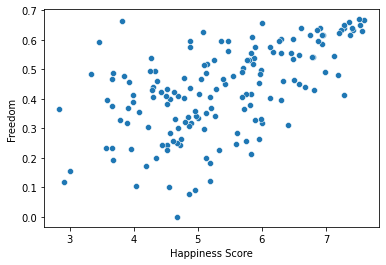

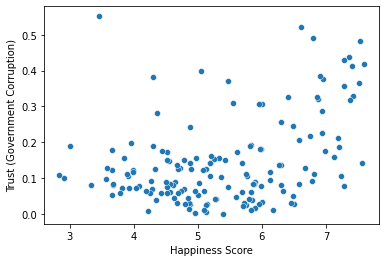

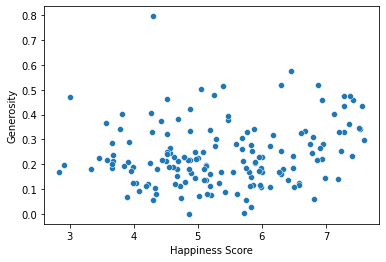

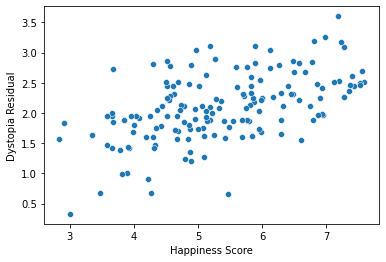

In [11]:
for i in float_col:
    plt.figure()
    sns.scatterplot( x = 'Happiness Score'  , y = i, data = df)
    plt.show()
# we can understand the relationshop between different different float type variables

In [12]:
float_col

Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

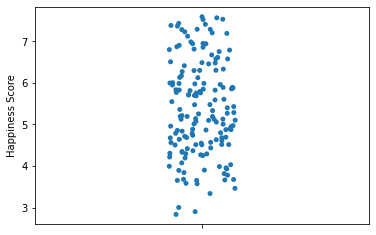

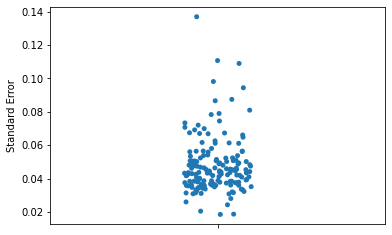

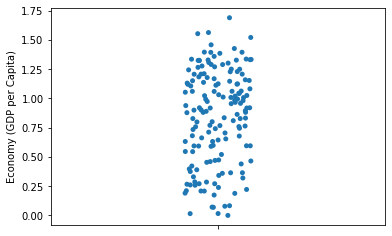

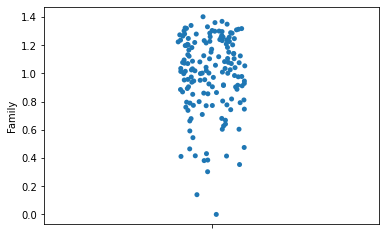

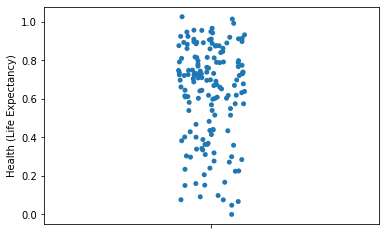

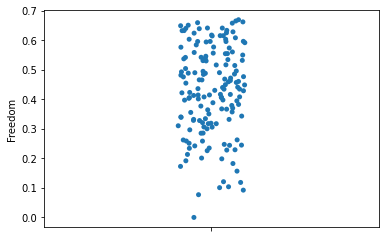

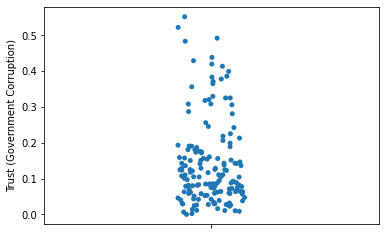

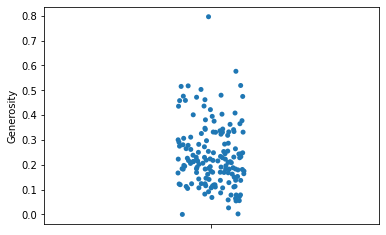

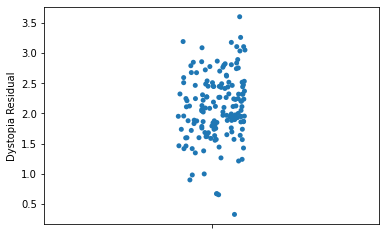

In [13]:
for i in float_col:
    plt.figure()
    sns.stripplot(y = df[i])
    plt.show()

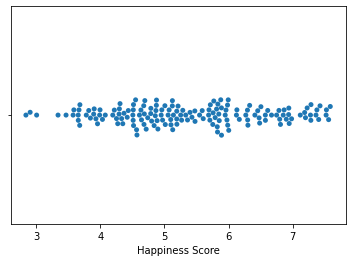

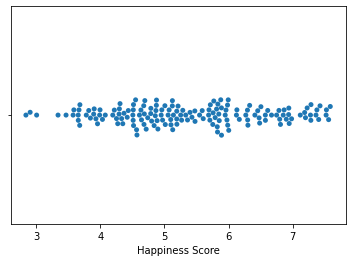

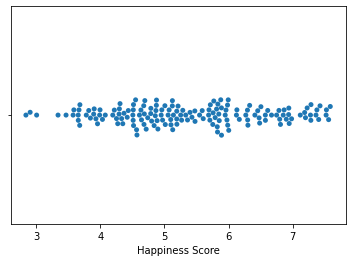

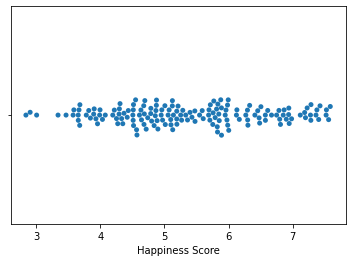

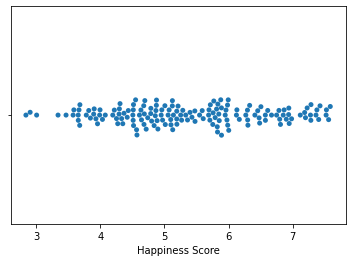

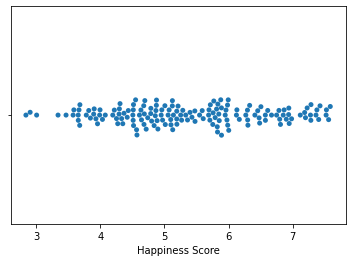

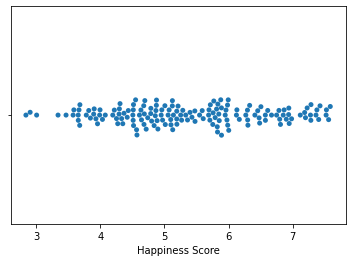

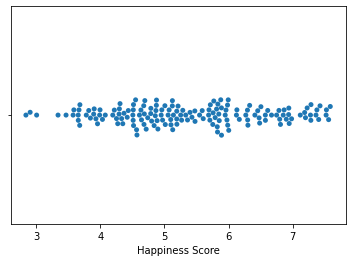

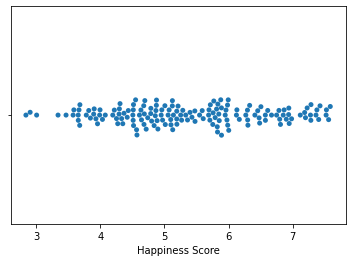

In [14]:
for i in float_col:
    plt.figure()
    sns.swarmplot(x = df['Happiness Score'])   
    plt.show()  # We can obersve spread of value, as we have observed data is not much spread

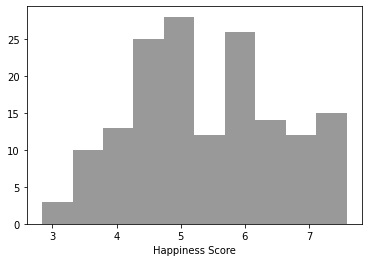

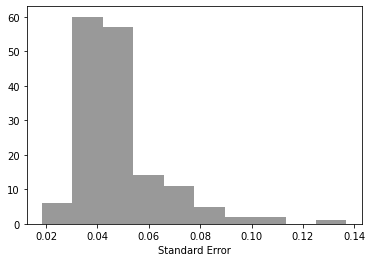

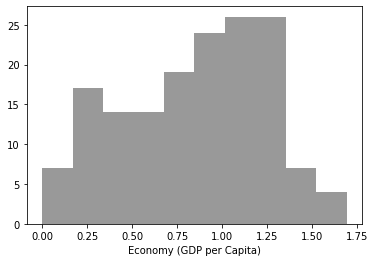

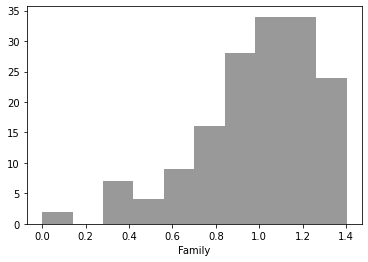

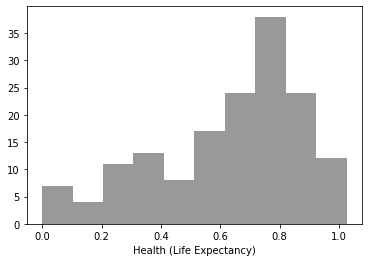

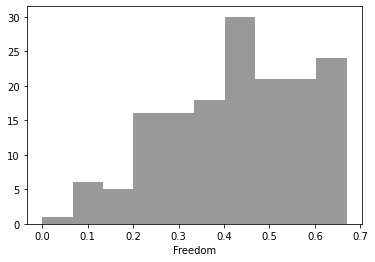

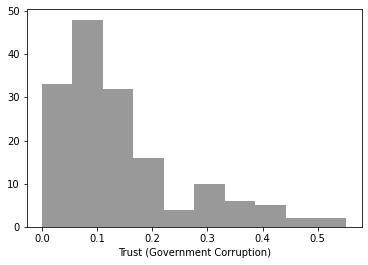

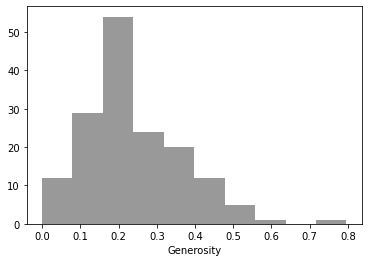

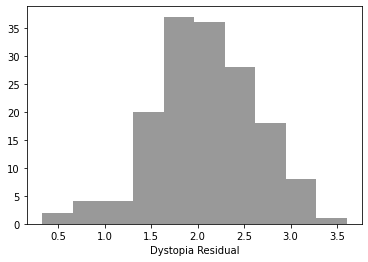

In [15]:
for i in float_col:
    plt.figure()
    sns.distplot(df[i], kde = False, color = 'black', bins = 10)
# We can see the relative frequencies here

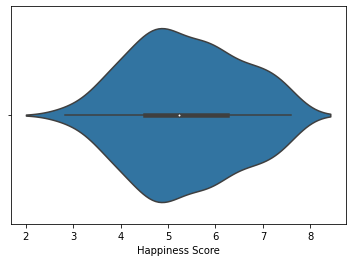

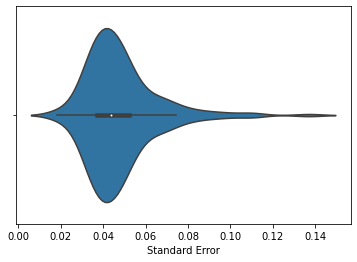

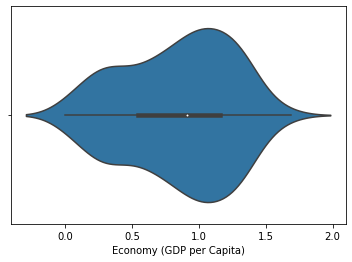

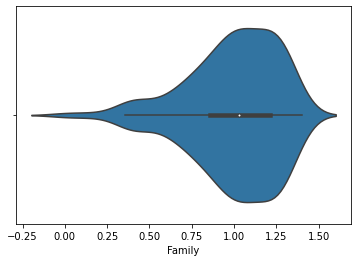

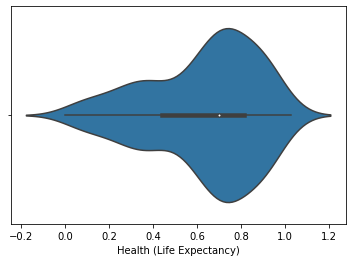

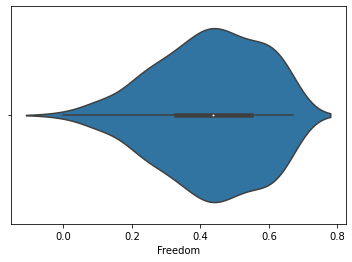

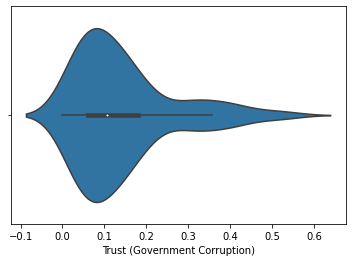

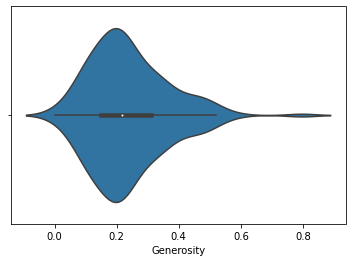

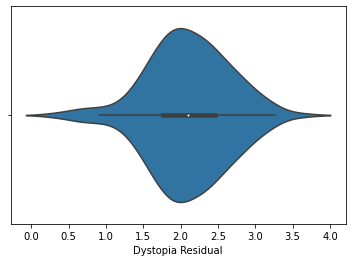

In [16]:
for i in float_col:
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')
# We can see the relative frequencies here

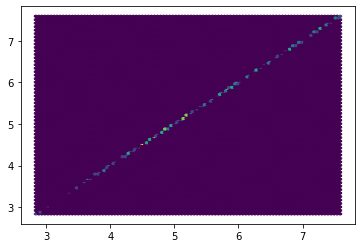

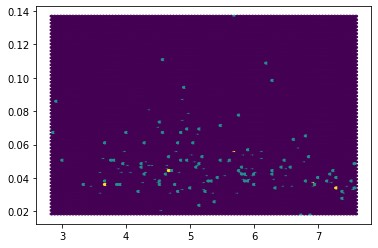

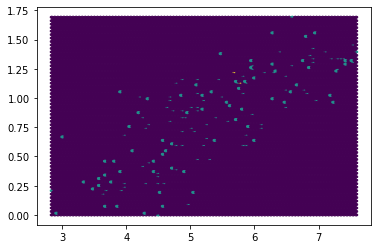

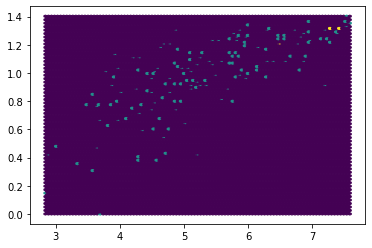

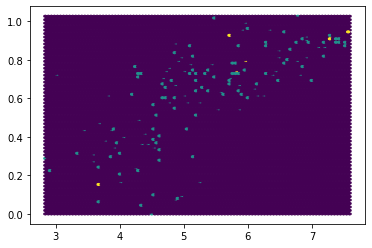

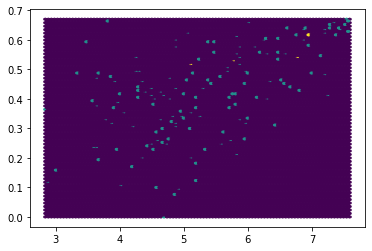

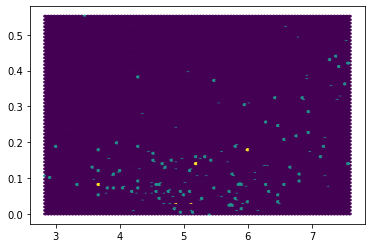

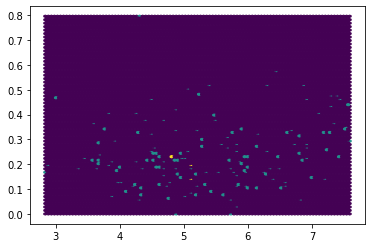

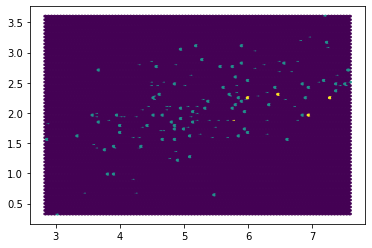

In [17]:
# plot.hexbin(x='price', y='points', gridsize=15)

for i in float_col:
    plt.figure()
    plt.hexbin( x = 'Happiness Score', y = i, data = df)

## Outliers

#### z score

In [18]:
from scipy.stats import zscore

In [19]:
z = np.abs(zscore(df))
df_z = df[(z<3).all(axis = 1)]

In [20]:
df_z.shape

(124, 18)

In [21]:
(df.shape[0] - df_z.shape[0])/  df.shape[0]  *100    #  outlier removing will lead to high loss (21.518987341772153 %)

21.518987341772153

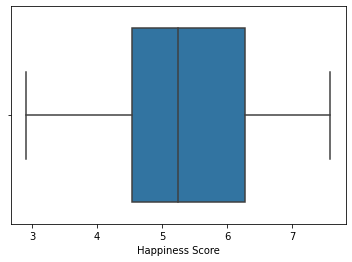

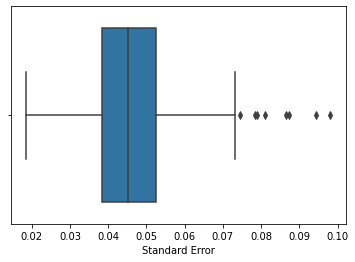

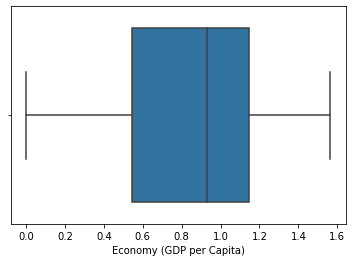

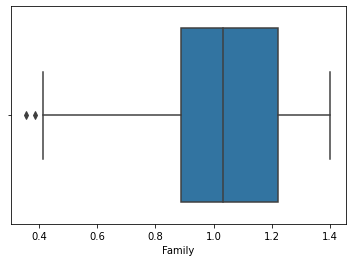

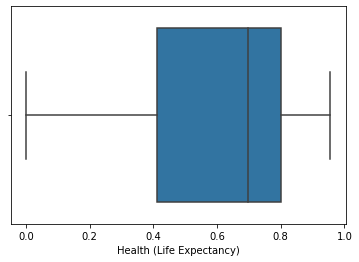

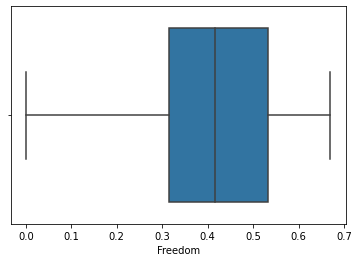

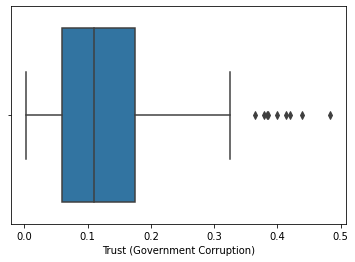

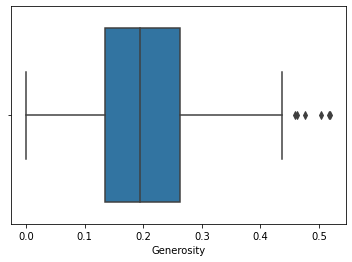

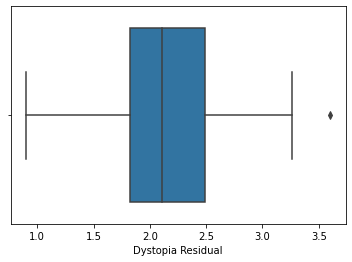

In [22]:
for i in float_col:
    plt.figure()
    sns.boxplot(df_z[i])
    plt.show()  

#### IQR

In [23]:
# Applying Interquartile method 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[~((df < (Q1-1.5*IQR)) | ( df >( Q3+1.5*IQR))).any(axis = 1)]

In [24]:
df_IQR.shape

(45, 18)

In [25]:
(df.shape[0] - df_IQR.shape[0])/df.shape[0] * 100

71.51898734177216

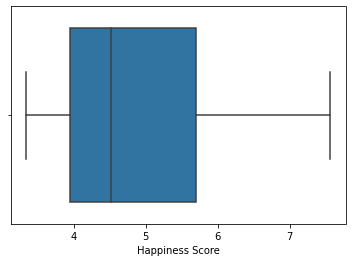

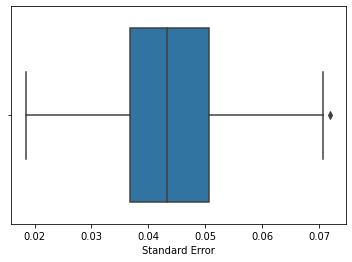

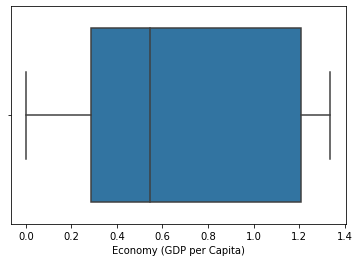

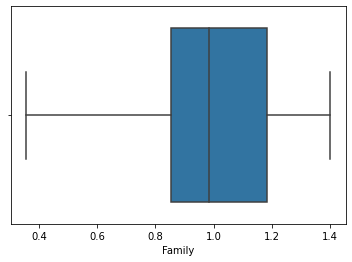

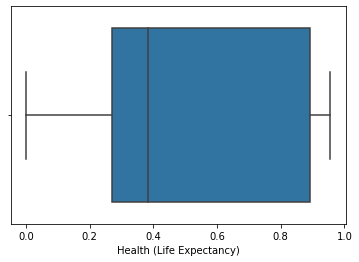

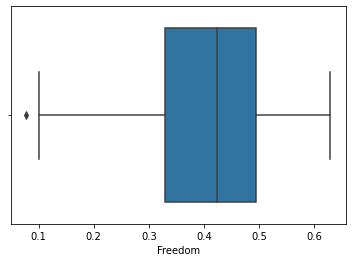

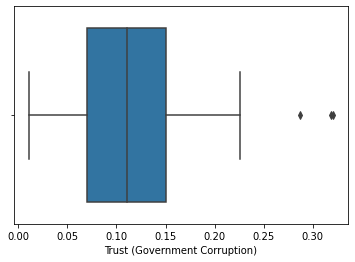

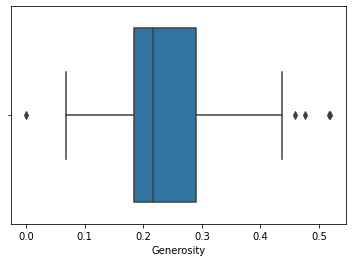

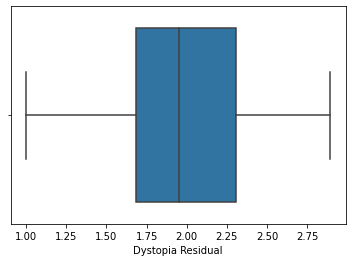

In [26]:
for i in float_col:
    plt.figure()
    sns.boxplot(df_IQR[i])
    plt.show() 

In [28]:
# IQR is leading high loos loss o data that is of 71.5189% and by using z score we lossing data of 21.5189 % approx
# therefore we will chose z score outliers method for  dataframe

In [30]:
df.shape

(158, 18)

# Skewness

In [31]:
positive_skew = []
negative_skew = []

for i in float_col:
    print( i , ':', df[i].skew())
    if df[i].skew() > 0.5:
        positive_skew.append(i)
    elif df[i].skew() < -0.5:
        negative_skew.append(i)

Happiness Score : 0.09776909409344678
Standard Error : 1.9834393956708816
Economy (GDP per Capita) : -0.3175746523312048
Family : -1.0068931265421133
Health (Life Expectancy) : -0.7053284856924459
Freedom : -0.41346197289710274
Trust (Government Corruption) : 1.3854625954673152
Generosity : 1.001960575563042
Dystopia Residual : -0.23891080938012677


In [32]:
print(positive_skew)
print(negative_skew)

['Standard Error', 'Trust (Government Corruption)', 'Generosity']
['Family', 'Health (Life Expectancy)']


In [33]:
for j in positive_skew:
    df[j] = np.sqrt(df[i])

for i in negative_skew:
    df[i] = np.sqrt(max (df[i] +1)  - df[i])

In [34]:

for i in float_col:
    print( i , ':', df[i].skew())

Happiness Score : 0.09776909409344678
Standard Error : -0.9305639836908717
Economy (GDP per Capita) : -0.3175746523312048
Family : 0.7740611745524292
Health (Life Expectancy) : 0.5653622620752472
Freedom : -0.41346197289710274
Trust (Government Corruption) : -0.9305639836908717
Generosity : -0.9305639836908717
Dystopia Residual : -0.23891080938012677


Skewness:  0.09776909409344678


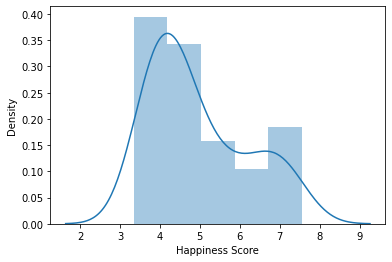




Skewness:  -0.9305639836908717


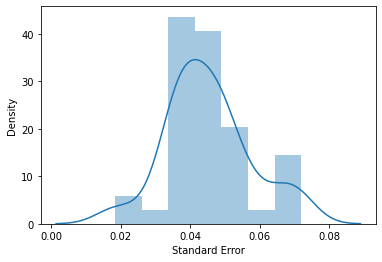




Skewness:  -0.3175746523312048


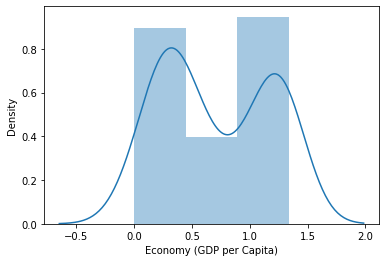




Skewness:  0.7740611745524292


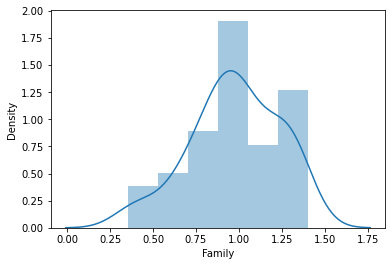




Skewness:  0.5653622620752472


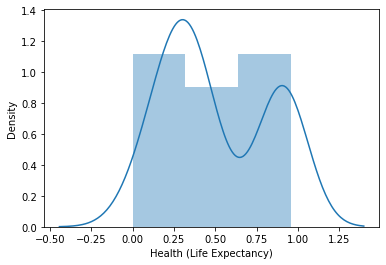




Skewness:  -0.41346197289710274


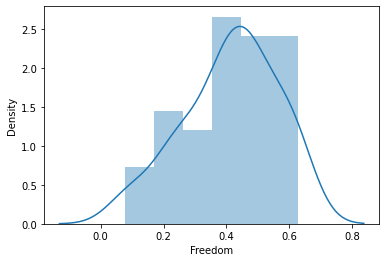




Skewness:  -0.9305639836908717


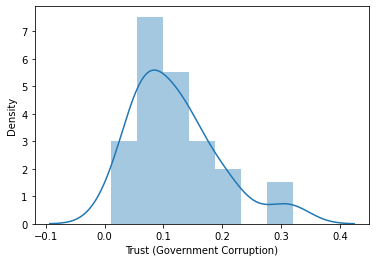




Skewness:  -0.9305639836908717


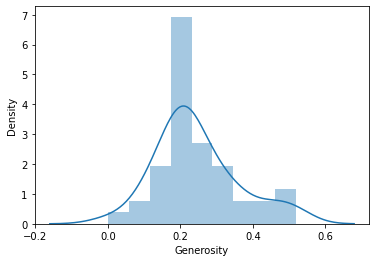




Skewness:  -0.23891080938012677


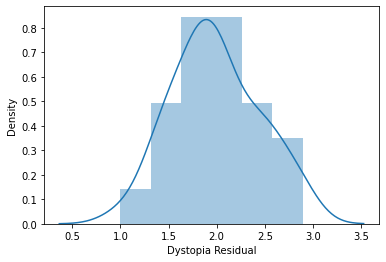

In [35]:
for i in float_col:
    print('Skewness: ', df[i].skew())
    plt.figure()
    sns.distplot(df_IQR[i])
    plt.show() 
    print('\n\n')

## MultiColinearity

In [36]:
df.dtypes

Happiness Score                    float64
Standard Error                     float64
Economy (GDP per Capita)           float64
Family                             float64
Health (Life Expectancy)           float64
Freedom                            float64
Trust (Government Corruption)      float64
Generosity                         float64
Dystopia Residual                  float64
Australia and New Zealand            uint8
Central and Eastern Europe           uint8
Eastern Asia                         uint8
Latin America and Caribbean          uint8
Middle East and Northern Africa      uint8
North America                        uint8
Southeastern Asia                    uint8
Southern Asia                        uint8
Sub-Saharan Africa                   uint8
dtype: object

In [37]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,1.434365,0.846137,1.182771,1.176678,0.428615,1.434365,1.434365,2.098977,0.012658,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165
std,1.145010,0.204542,0.403121,0.110968,0.102400,0.150693,0.204542,0.204542,0.553550,0.112150,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207
min,2.839000,0.573219,0.000000,1.000000,1.000000,0.000000,0.573219,0.573219,0.328580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,1.326427,0.545808,1.089873,1.101924,0.328330,1.326427,1.326427,1.759410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.232500,1.447554,0.910245,1.171631,1.152625,0.435515,1.447554,1.447554,2.095415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.243750,1.569208,1.158448,1.243144,1.259391,0.549092,1.569208,1.569208,2.462415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000
max,7.587000,1.897930,1.690420,1.549913,1.423113,0.669730,1.897930,1.897930,3.602140,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa
Happiness Score,1.000000,0.526155,0.780966,-0.752825,-0.732800,0.568211,0.526155,0.526155,0.530474,0.189404,-0.017781,0.043593,0.270962,0.010395,0.188213,-0.012551,-0.149944,-0.598318
Standard Error,0.526155,1.000000,0.046061,-0.162792,-0.019186,0.059266,1.000000,1.000000,0.990583,0.039286,-0.051946,-0.155999,0.348025,-0.084830,0.078138,-0.129489,-0.043431,-0.077699
Economy (GDP per Capita),0.780966,0.046061,1.000000,-0.652849,-0.824290,0.370300,0.046061,0.046061,0.040059,0.125597,0.113626,0.151116,0.030705,0.209213,0.144904,-0.034912,-0.153053,-0.674692
Family,-0.752825,-0.162792,-0.652849,1.000000,0.546604,-0.459225,-0.162792,-0.162792,-0.155107,-0.143109,-0.105667,-0.077163,-0.164719,0.106220,-0.128837,0.052193,0.267086,0.396818
Health (Life Expectancy),-0.732800,-0.019186,-0.824290,0.546604,1.000000,-0.367287,-0.019186,-0.019186,-0.023328,-0.139065,-0.158842,-0.208657,-0.110601,-0.107432,-0.120131,-0.042407,0.086084,0.812072
Freedom,0.568211,0.059266,0.370300,-0.459225,-0.367287,1.000000,0.059266,0.059266,0.062783,0.163338,-0.222040,0.044804,0.195791,-0.169455,0.121274,0.210224,-0.079231,-0.242908
Trust (Government Corruption),0.526155,1.000000,0.046061,-0.162792,-0.019186,0.059266,1.000000,1.000000,0.990583,0.039286,-0.051946,-0.155999,0.348025,-0.084830,0.078138,-0.129489,-0.043431,-0.077699
Generosity,0.526155,1.000000,0.046061,-0.162792,-0.019186,0.059266,1.000000,1.000000,0.990583,0.039286,-0.051946,-0.155999,0.348025,-0.084830,0.078138,-0.129489,-0.043431,-0.077699
Dystopia Residual,0.530474,0.990583,0.040059,-0.155107,-0.023328,0.062783,0.990583,0.990583,1.000000,0.034141,-0.066659,-0.150279,0.381649,-0.082078,0.078377,-0.140727,-0.032077,-0.083353
Australia and New Zealand,0.189404,0.039286,0.125597,-0.143109,-0.139065,0.163338,0.039286,0.039286,0.034141,1.000000,-0.053685,-0.022496,-0.045540,-0.043105,-0.012821,-0.027828,-0.024379,-0.065924


<AxesSubplot:>

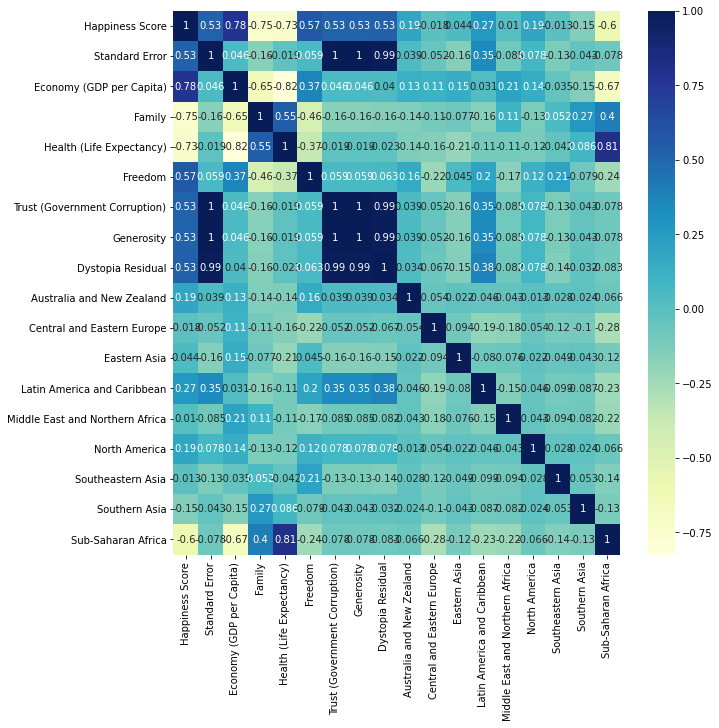

In [39]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True,  cmap = 'YlGnBu')

In [40]:
# seperate the dataset into x(independent) and y(target)

In [41]:
y = df.iloc[:, 2]
x = df.drop(columns = ['Happiness Score'], axis = 1 )
print('Shape of x : ', x.shape)
print('Shape of y : ', y.shape)

Shape of x :  (158, 17)
Shape of y :  (158,)


<AxesSubplot:>

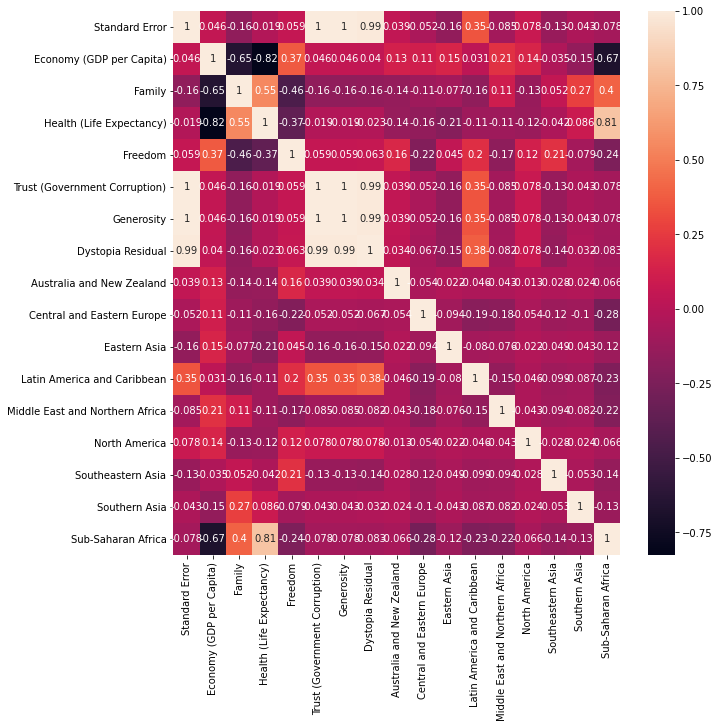

In [42]:
plt.figure(figsize = (10, 10))
sns.heatmap(x.corr(), annot = True)

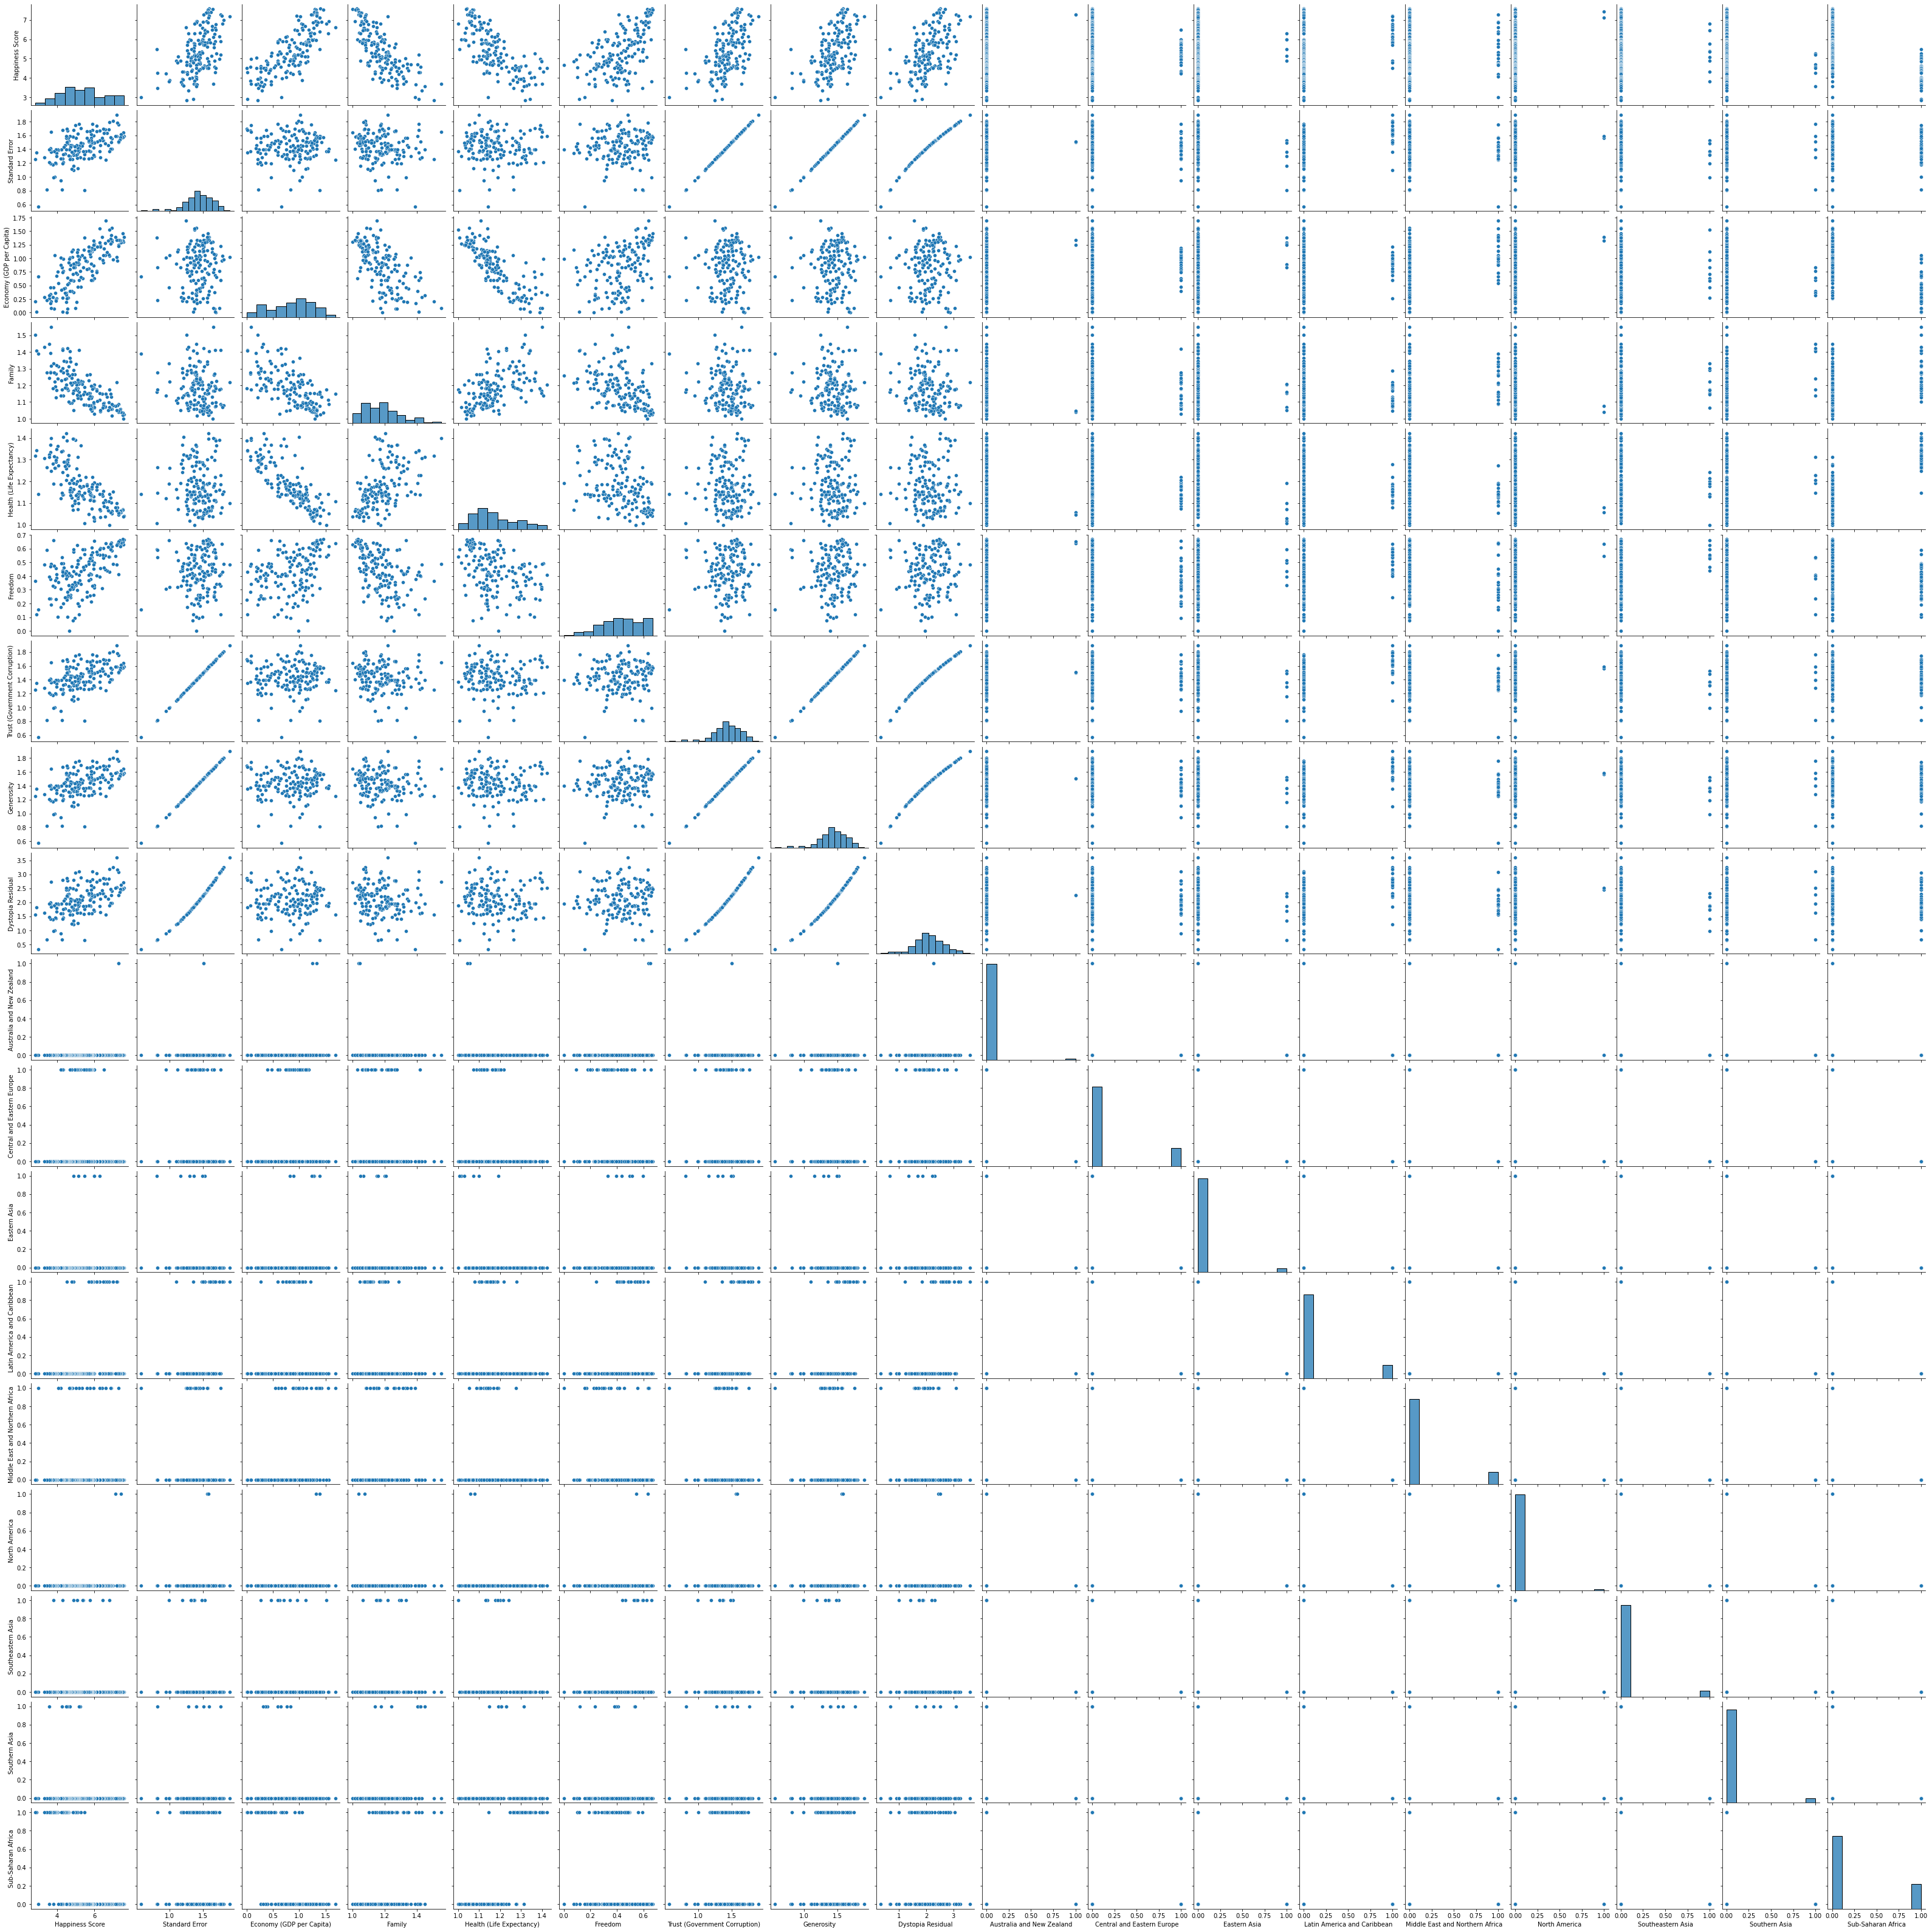

In [43]:
sns.pairplot(df)

In [45]:
# Apply VIF to know about Multicolinearity of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif = pd.DataFrame()
vif['Variables'] = x.columns
vif['VIF Factor'] = [variance_inflation_factor(x.values, num) for num in range(x.shape[1])  ]
vif
# 1. "standard Error" is highly correlated with "Trust (Government Corruption)" and "Generosity"
# 2. " Trust(Goverment Corruption)" and Generiosity is also showing highly correlated with each other
# 3. As per observed from the heatmap with Target variable these three columns are showing correlation of 0.52
# 4. Standard Error columns need to be delete
# 5. Other varibales are also showing high correlation but we can not delete all the columns

,Variables,VIF Factor
0,Standard Error,inf
1,Economy (GDP per Capita),17.713634
2,Family,199.758257
3,Health (Life Expectancy),530.938723
4,Freedom,14.441540
5,Trust (Government Corruption),inf
6,Generosity,inf
7,Dystopia Residual,701.860922
8,Australia and New Zealand,1.104566
9,Central and Eastern Europe,3.387171


In [47]:
x.drop(columns = ['Standard Error'], axis = 1, inplace =True)

In [48]:
x.columns  

Index(['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Australia and New Zealand',
       'Central and Eastern Europe', 'Eastern Asia',
       'Latin America and Caribbean', 'Middle East and Northern Africa',
       'North America', 'Southeastern Asia', 'Southern Asia',
       'Sub-Saharan Africa'],
      dtype='object')

## Scaling

In [49]:
# Out data is already seems like a scalled
# we can not apply scaling to the ordinal or catogorical data

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
ss = StandardScaler()
ss.fit(x)

StandardScaler()

In [52]:
x.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa
Country,,,,,,,,,,,,,,,,
Switzerland,1.39651,1.026021,1.041067,0.66557,1.586625,1.586625,2.51738,0,0,0,0,0,0,0,0,0
Iceland,1.30232,1.000000,1.037984,0.62877,1.643779,1.643779,2.70201,0,0,0,0,0,0,0,0,0
Denmark,1.32548,1.020613,1.072665,0.64938,1.578620,1.578620,2.49204,0,0,0,0,0,0,0,0,0
Norway,1.45900,1.035027,1.067727,0.66973,1.570131,1.570131,2.46531,0,0,0,0,0,0,0,0,0
Canada,1.32629,1.039048,1.058121,0.63297,1.565810,1.565810,2.45176,0,0,0,0,0,1,0,0,0


## Machine Learning Model

In [53]:
# as per observation from the pairplot we can apply LinearRegression here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [54]:
max_accuracy = 0
r_stat = 0

for i in range (200):

    x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = i)
    model = LinearRegression()
    model.fit(x_train, y_train)
    m_pred = model.predict(x_test)
    r = r2_score(y_test, m_pred)
#     print(r*100, "at random-state", i)  
    if r > max_accuracy:
        max_accuracy = r
        r_stat = i
print("Best Accurancy is ",max_accuracy , "at  random state",  r_stat)
# Best Accurancy is   1.0 on random state 0

Best Accurancy is  1.0 at  random state 0


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.30, random_state = r_stat)
linear_r = LinearRegression()
linear_r.fit(x_train,y_train)
lr_predict = linear_r.predict(x_test)
linear_r.score(x_train, y_train)
print('r2_score: ', r2_score(y_test, lr_predict))
print('Mean Squared Error: ', mean_squared_error(y_test, lr_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, lr_predict))

r2_score:  1.0
Mean Squared Error:  3.4207349537365692e-31
Mean Absolute Error:  4.82759087335379e-16


In [56]:
cross_val_score(linear_r, x, y, cv = 5).mean()

1.0

#### DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr_predict = dtr.predict(x_test)
dtr.score(x_train, y_train)
print('r2_score: ', r2_score(y_test, dtr_predict))
print('Mean Squared Error: ', mean_squared_error(y_test, dtr_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtr_predict))

r2_score:  0.9957719582813848
Mean Squared Error:  0.0006582001312500006
Mean Absolute Error:  0.013390625000000005


In [59]:
cross_val_score(dtr, x, y, cv = 5).mean()

0.9843345561265204

#### Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_predict = rfr.predict (x_test)
r_rfr = r2_score(y_test, rfr_predict)
print('r2_score: ', r2_score(y_test, rfr_predict))
print('Mean Squared Error: ', mean_squared_error(y_test, rfr_predict))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfr_predict))

r2_score:  0.9939512383337047
Mean Squared Error:  0.0009416405957222967
Mean Absolute Error:  0.01491191875000004


In [61]:
cross_val_score(rfr, x, y, cv = 5).mean()

0.9805283666774922

#### Support vector regression 

In [62]:
from sklearn.svm import SVR

In [63]:
svr = SVR(kernel = 'linear')
svr.fit(x_train ,y_train)
pred_svr = svr.predict(x_test)
svr.score(x_train, y_train)

print('r2_score: ', r2_score(y_test, pred_svr))
print('Mean Squared Error: ', mean_squared_error(y_test, pred_svr))
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred_svr))

r2_score:  0.975494982376854
Mean Squared Error:  0.00381481709246732
Mean Absolute Error:  0.0524931149523284


In [64]:
cross_val_score(rfr, x, y, cv = 5).mean()

0.9782724308043715

In [65]:
#                         	r2_score          	CV                   Difference
# linear_r                 	1                	1                         0
# dtr                     	0.995795924      	0.974182992               0.0216
# rfr                     	0.994304101      	0.977343751               0.0169
# svr                     	0.975494982      	0.978272430               0.0026
# In the linear regression model difference is 0, linearegression will be best for deployment 

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# gcv = GridSearchCV()
parameter = {'fit_intercept' : [bool], 'normalize' : [bool], 'positive' : [bool]}

In [68]:
gcv = GridSearchCV(LinearRegression(), parameter, cv =5)
gcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [<class 'bool'>],
                         'normalize': [<class 'bool'>],
                         'positive': [<class 'bool'>]})

In [69]:
gcv.best_params_

{'fit_intercept': bool, 'normalize': bool, 'positive': bool}

In [70]:
final_model = LinearRegression(fit_intercept= bool, normalize= bool, positive = bool)
final_model.fit(x_train, y_train)

LinearRegression(fit_intercept=<class 'bool'>, normalize=<class 'bool'>,
                 positive=<class 'bool'>)

In [71]:
final_pred = final_model.predict(x_test)

print('r2_score: ', r2_score(y_test, final_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, final_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, final_pred))

r2_score:  1.0
Mean Squared Error:  5.8261888538995636e-33
Mean Absolute Error:  4.401860820291148e-17


In [72]:
import joblib

In [73]:
joblib.dump(final_model, 'happiness_score_model.pkl' )

['happiness_score_model.pkl']